<center><h1> - Brainsong continuous data -  </h1> </center>
</p>
<center><h3>Correlation analysis of EEG spectrum and subjective feedback</h3></center> 

<center>Alix Lamouroux </center> 

#Import functions

In [1]:
!pip install mne 


     |████████████████████████████████| 6.8MB 4.6MB/s 


In [2]:
from coranalysis import get_power, get_measures, plot_powers, pearson_cor
#from dataframe import df
from Useful_function import plot_eeg2
from preproc import import_file, run_preprocessing_eog, get_clean_idx


## I. EEG signal

###I.1 look at signal

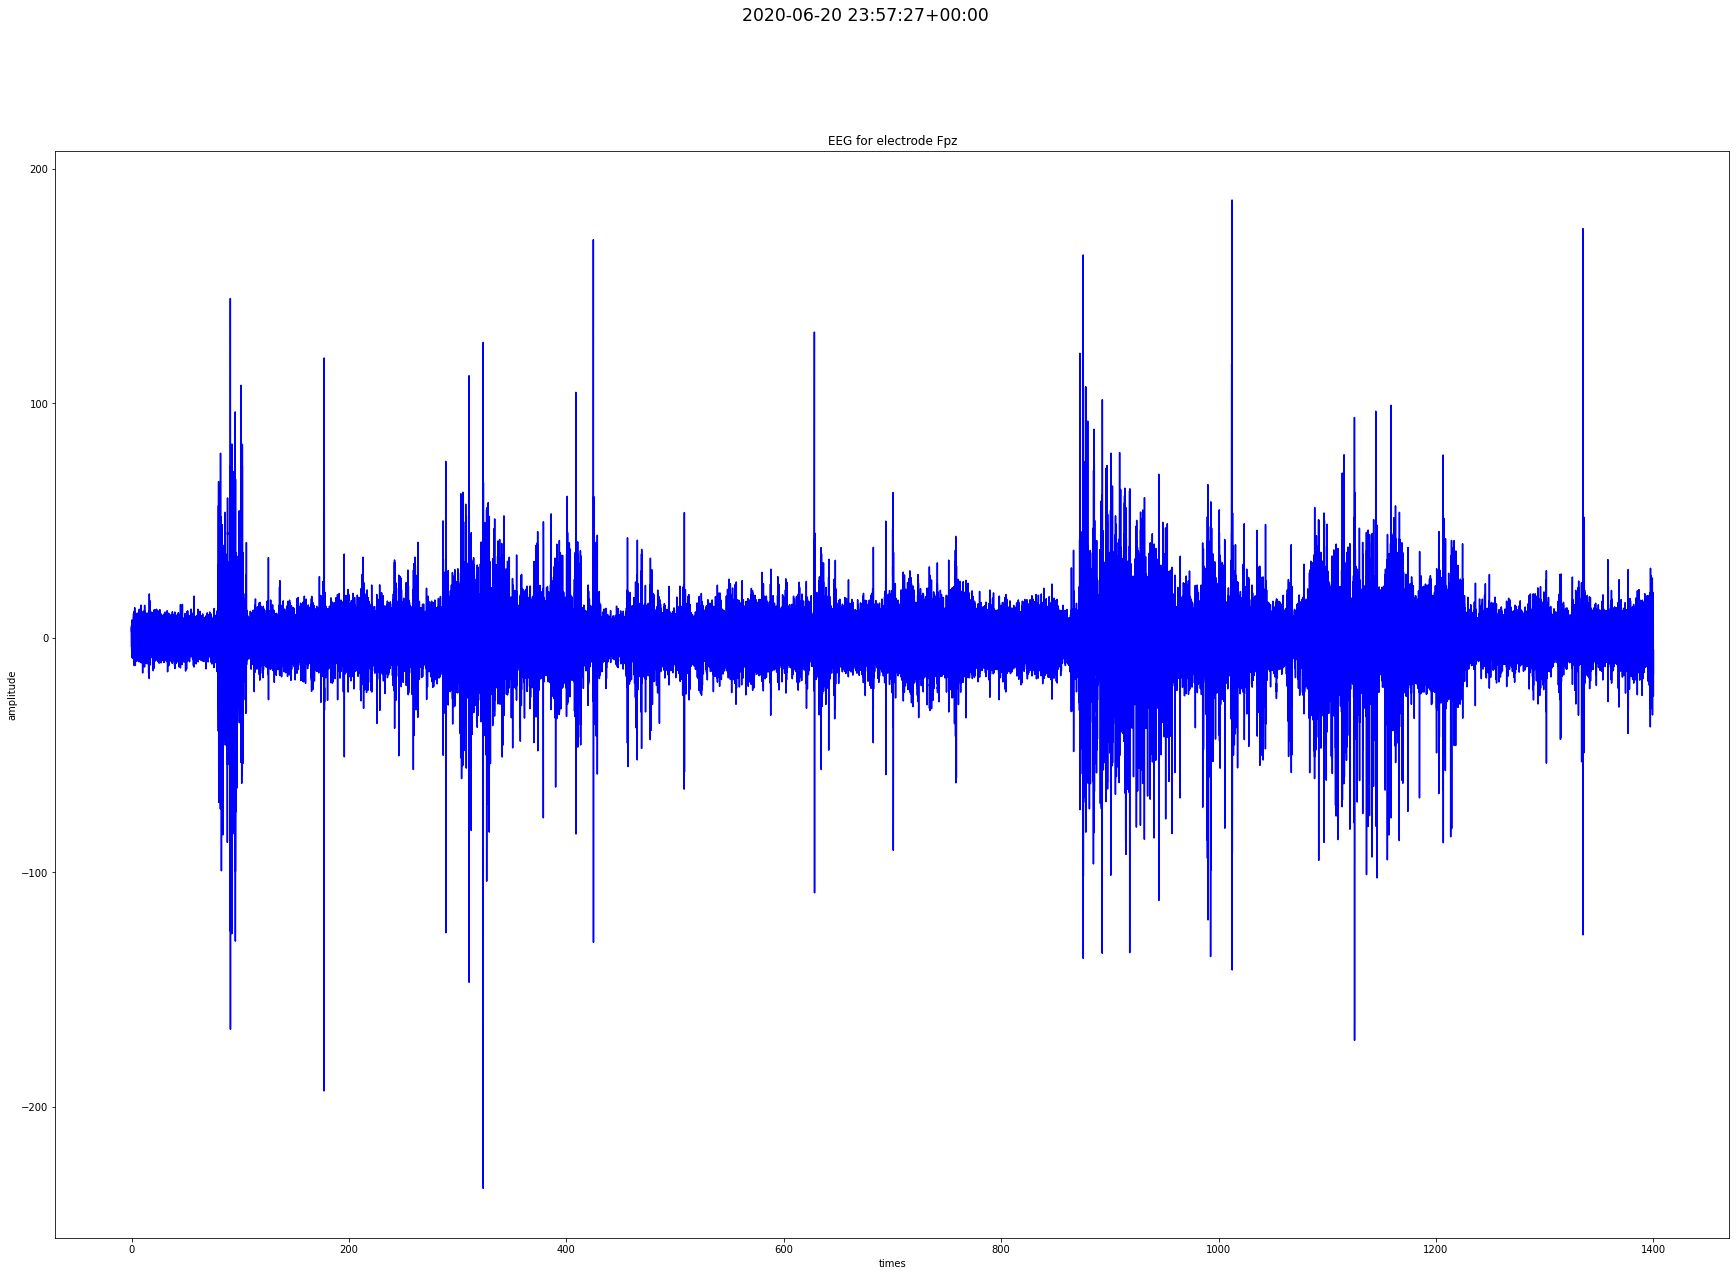

In [6]:
raw = import_file('data/caroltrio_eeg_2019.06.20_23.57.27.edf')

plot_eeg2(raw, tmin = 0, tmax = 1400)

### I. 2 remove eog artefacts and get powers

<Annotations | 0 segments>


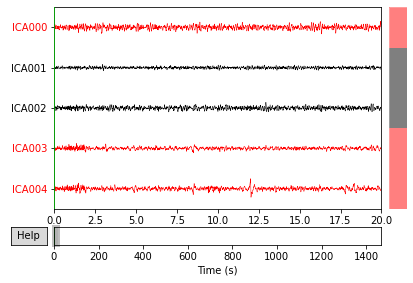

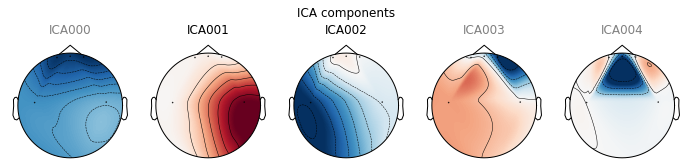

Transforming to ICA space (5 components)
Zeroing out 3 ICA components


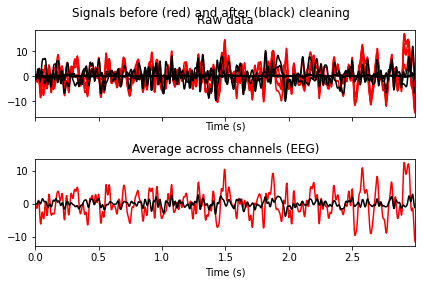

matching ICA component found


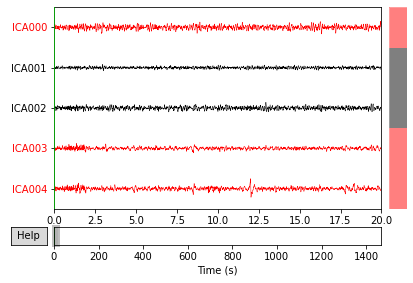

Transforming to ICA space (5 components)
Zeroing out 3 ICA components


In [7]:
new_raw = run_preprocessing_eog(raw, show= True)

Looking at the new signal: 

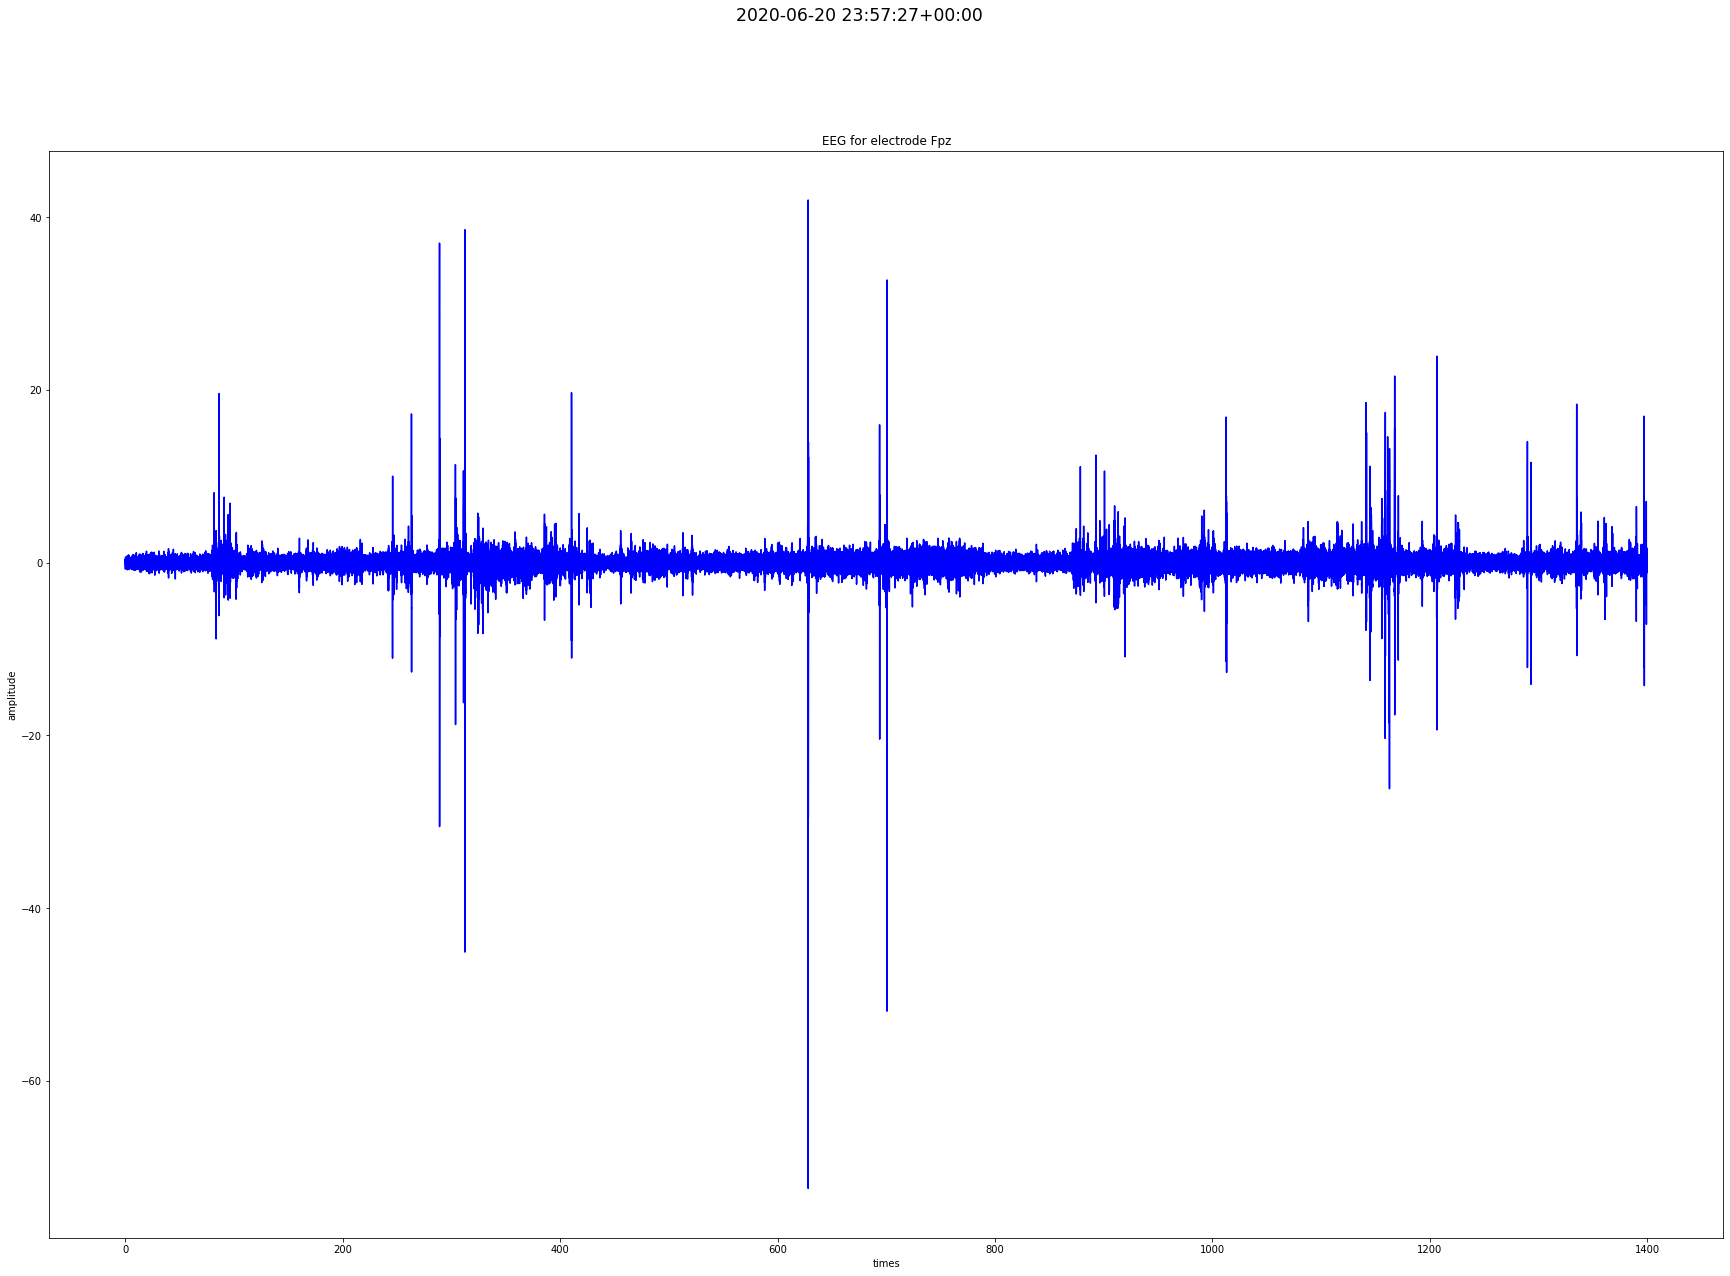

In [8]:
plot_eeg2(new_raw, tmax =1400)

finding bad segments: 

In [9]:
indices = get_clean_idx(new_raw)

Not setting metadata
Not setting metadata
1467 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1467 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on 

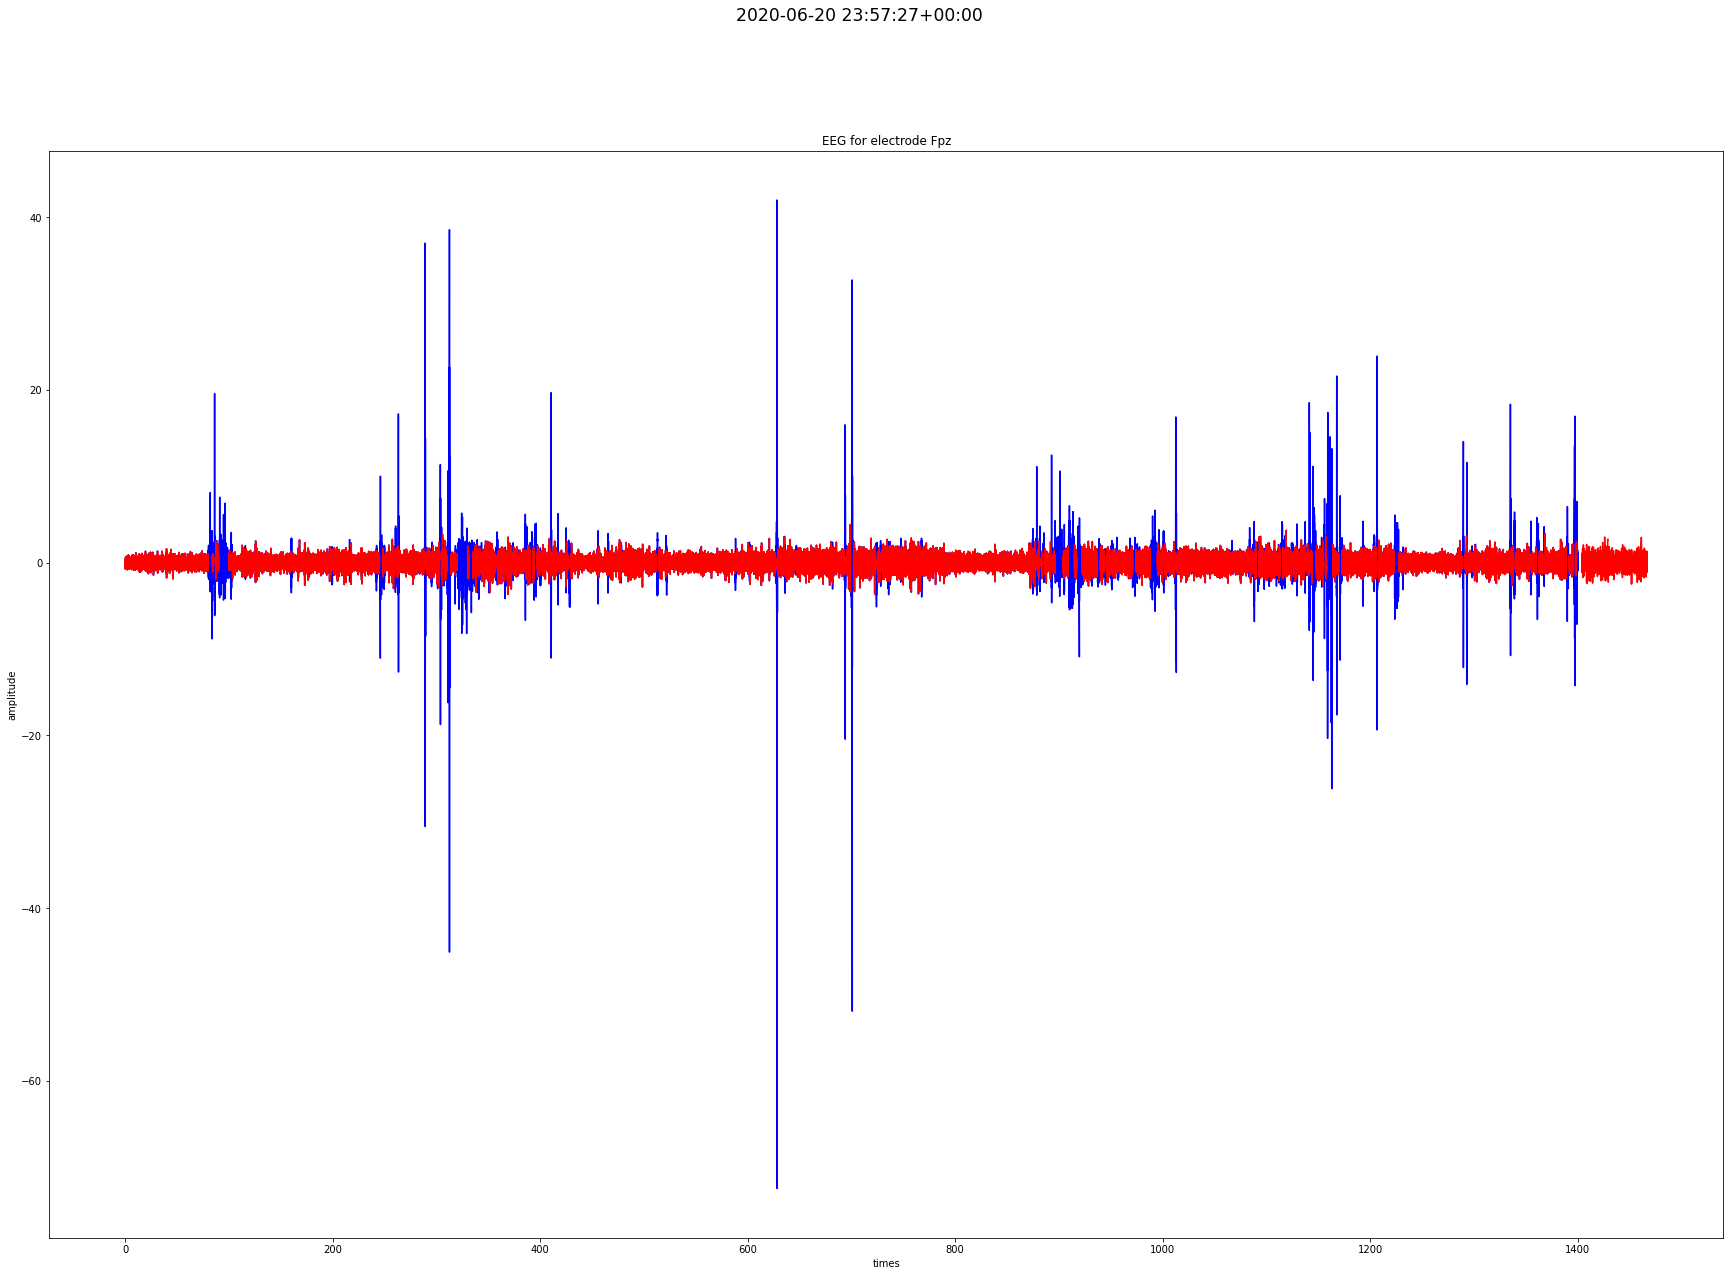

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plot_eeg2(new_raw, tmax = 1400)

eeg_array =new_raw.copy().pick_channels(['Fpz']).get_data()

for indice in indices:
  time_indices = np.arange(indice*250, (indice+1)*250)
  x = new_raw.times[time_indices]
  y = eeg_array[0, time_indices]
  plt.plot(x,y, color = 'red')

### I.3 Power spectrum 

Time frequency plot: 

<Annotations | 0 segments>
matching ICA component found
Transforming to ICA space (5 components)
Zeroing out 3 ICA components
Not setting metadata
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 367249 original time points ...
0 bad epochs dropped
No baseline correction applied


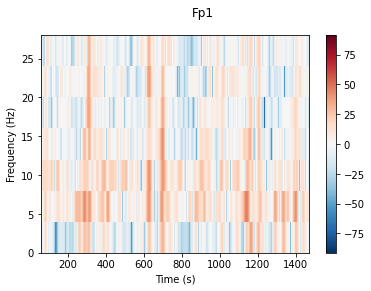

In [11]:
raw, power, times = get_power(show = False)

## II. Subjective feed back

In [ ]:
subjt, focus = get_measures(power = power)

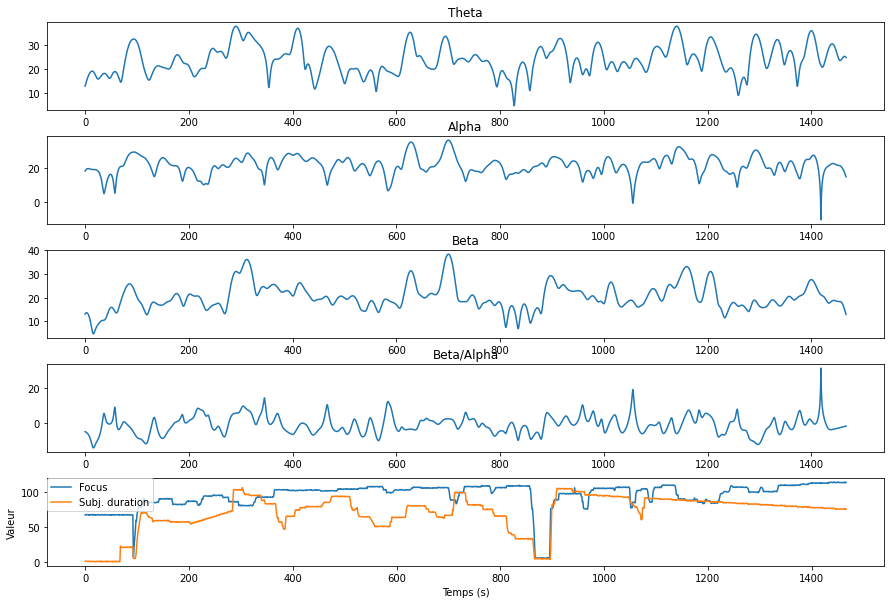

In [ ]:
plot_powers(power, times, subjt, focus)

## III. Pearson correlation

1467 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1467 events and 251 original time points ...
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'T8']
  

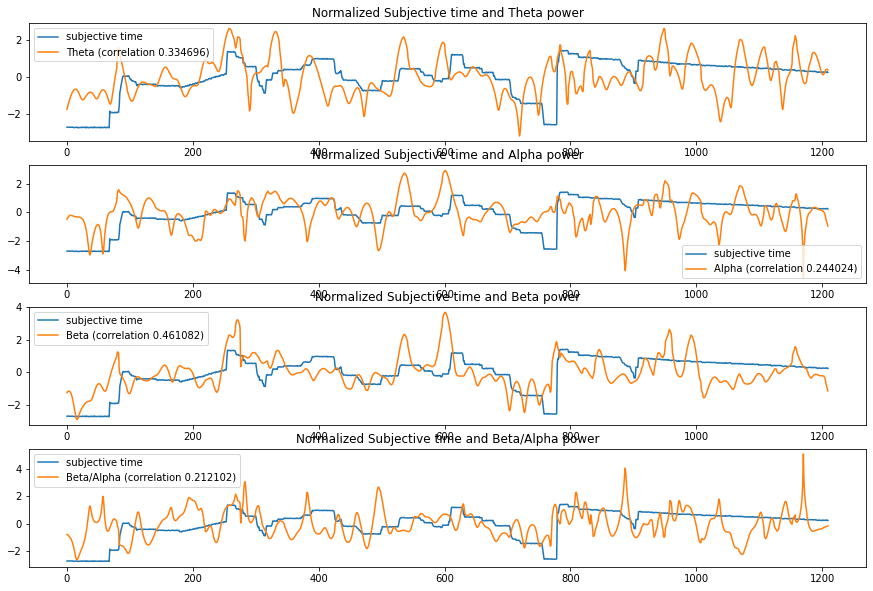

In [ ]:
pearson_cor(power, raw, subjt)

##IV. Spoc

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Compu

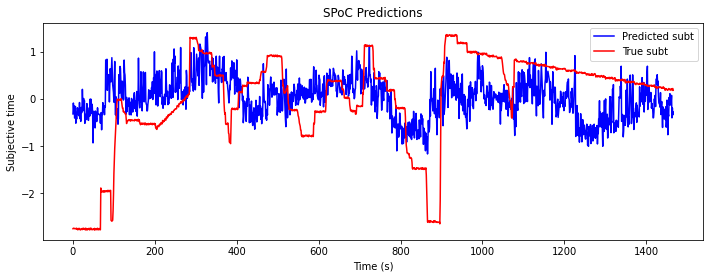

In [ ]:
from mne.io import RawArray
from mne import make_fixed_length_events
from mne import create_info
from mne.decoding import SPoC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_predict
from mne.viz import tight_layout
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPRegressor
from mne import Epochs 
from Useful_function import stand

raw2 = raw.copy().filter(13,25, fir_design='firwin')

# Build epochs as sliding windows over the continuous raw file
events = make_fixed_length_events(raw2, id=1, duration=1)

# Epoch length is 1 second
eeg_epochs = Epochs(raw2.copy().crop(tmax = 1467), events, tmin=0., tmax=1., baseline=None, reject = dict(eeg = 60))

eeg_epochs.drop_bad()
ind = eeg_epochs.selection

# Prepare classification
X = eeg_epochs.get_data()
dat = subjt[:,1][ind]
y = stand(dat)
# Classification pipeline with SPoC spatial filtering and Ridge Regression
spoc = SPoC(n_components=4, log=True, reg='oas', rank='full')
clf = make_pipeline(spoc, RidgeCV())
#clf2 = make_pipeline(spoc, RidgeCV())

# Define a two fold cross-validation
cv = KFold(n_splits=2, shuffle=False)

# Run cross validaton
y_preds = cross_val_predict(clf, X, y, cv=cv)
#y_preds2 = cross_val_predict(clf2, X,y, cv = cv)

# Plot the True EMG power and the EMG power predicted from MEG data
fig, ax = plt.subplots(1, 1, figsize=[10, 4])
times = raw.times[eeg_epochs.events[:, 0] - raw.first_samp]
ax.plot(times, y_preds, color='b', label='Predicted subt')
#ax.plot(times, y_preds2, color='g', label='Predicted subt ridge')
ax.plot(times, y, color='r', label='True subt')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Subjective time')
ax.set_title('SPoC Predictions')
plt.legend()
tight_layout()
plt.show()


In [ ]:
from scipy.stats import pearsonr

print(pearsonr(y, y_preds))

(0.24943059280008664, 1.4921144351686075e-21)


## V. Audio check 

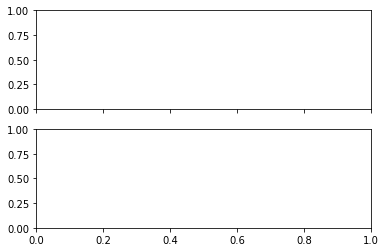

In [12]:
from testaudio import envelope

In [16]:
print(envelope.shape)

test = envelope[:1467]
print(test.shape)

(1546,)
(1467,)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Computing rank from data with rank='full'
    MAG: rank 5 from info
Reducing data rank from 5 -> 5
Estimating covariance using OAS
Done.
Compu

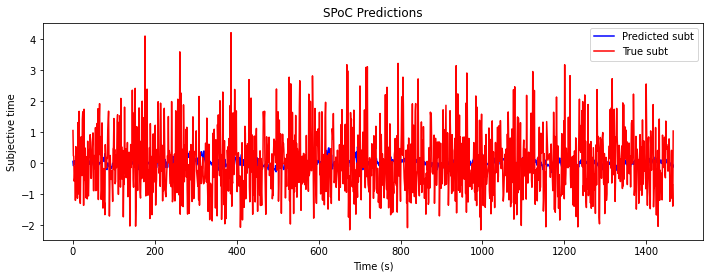

In [18]:
from mne.io import RawArray
from mne import make_fixed_length_events
from mne import create_info
from mne.decoding import SPoC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_predict
from mne.viz import tight_layout
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPRegressor
from mne import Epochs 
from Useful_function import stand

raw2 = raw.copy().filter(13,25, fir_design='firwin')

# Build epochs as sliding windows over the continuous raw file
events = make_fixed_length_events(raw2, id=1, duration=1)

# Epoch length is 1 second
eeg_epochs = Epochs(raw2.copy().crop(tmax = 1467), events, tmin=0., tmax=1., baseline=None, reject = dict(eeg = 60))

eeg_epochs.drop_bad()
ind = eeg_epochs.selection

# Prepare classification
X = eeg_epochs.get_data()
dat = test[ind]
y = stand(dat)
# Classification pipeline with SPoC spatial filtering and Ridge Regression
spoc = SPoC(n_components=4, log=True, reg='oas', rank='full')
clf = make_pipeline(spoc, RidgeCV())
#clf2 = make_pipeline(spoc, RidgeCV())

# Define a two fold cross-validation
cv = KFold(n_splits=2, shuffle=False)

# Run cross validaton
y_preds = cross_val_predict(clf, X, y, cv=cv)
#y_preds2 = cross_val_predict(clf2, X,y, cv = cv)

# Plot the True EMG power and the EMG power predicted from MEG data
fig, ax = plt.subplots(1, 1, figsize=[10, 4])
times = raw.times[eeg_epochs.events[:, 0] - raw.first_samp]
ax.plot(times, y_preds, color='b', label='Predicted subt')
#ax.plot(times, y_preds2, color='g', label='Predicted subt ridge')
ax.plot(times, y, color='r', label='True subt')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Subjective time')
ax.set_title('SPoC Predictions')
plt.legend()
tight_layout()
plt.show()

In [20]:

from scipy.stats import pearsonr
print(pearsonr(y, y_preds))

(-0.06046475507437451, 0.022788795905438596)
